In [58]:
import os
import pandas as pd
import numpy as np

In [59]:
np.random.seed(50)

In [60]:
from datetime import date
from matplotlib import pyplot as plt


In [61]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential, Model
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate


In [62]:
import tensorflow as tf
tf.random.set_seed(40)

In [63]:
import matplotlib.pyplot as plt
import datetime as dt 
import urllib.request, json

In [64]:
df = pd.read_csv('Diesel.csv')
df

Tanggal   qty      Jumlah
0     2016-01-01   836   5600932.0
1     2016-01-02   964   6460341.0
2     2016-01-03  1900  12727990.0
3     2016-01-04  1944  13023929.0
4     2016-01-05  7653  43238490.0
...          ...   ...         ...
2083  2021-12-27  3892  20043800.0
2084  2021-12-28  3848  19817200.0
2085  2021-12-29  3915  20162250.0
2086  2021-12-30  2715  13982250.0
2087  2021-12-31  3177  16361550.0

[2088 rows x 3 columns]

In [65]:
df.isnull().sum()

Tanggal    0
qty        0
Jumlah     0
dtype: int64

In [66]:
stockprices = df.sort_values('Tanggal')

In [67]:
def calculate_rmse(y_actual, y_predict):
    rmse = np.sqrt(np.mean((y_actual - y_predict)**2))
    return rmse

In [68]:
def calculate_mape(y_actual, y_predict):
    y_predict, y_actual = np.array(y_predict), np.array(y_actual)
    mape = np.mean(np.abs((y_actual - y_predict) / y_actual)) * 100
    return mape

In [69]:
def extract_seqX_outcomeY(data, N, offset_value):
    training_Sequence_X = []
    output_value_y = []

    for i in range(offset_value, len(data)):
        training_Sequence_X.append(data[i-N:i])
        output_value_y.append(data[i])

    return np.array(training_Sequence_X), np.array(output_value_y)

In [70]:
test_ratio = 0.2
training_ratio = 0.8

training_size = int(training_ratio * len(stockprices))
testing_size = int(test_ratio * len(stockprices))

print('training_size: ' + str(training_size))
print('testing_size: ' + str(testing_size))

train = stockprices[:1500][['Tanggal', 'Jumlah']]
test = stockprices[1500:][['Tanggal', 'Jumlah']]

print(train.shape)
print(test.shape)

training_size: 1670
testing_size: 417
(1500, 2)
(588, 2)


In [71]:
stockprices = stockprices.set_index('Tanggal')
stockprices

qty      Jumlah
Tanggal                     
2016-01-01   836   5600932.0
2016-01-02   964   6460341.0
2016-01-03  1900  12727990.0
2016-01-04  1944  13023929.0
2016-01-05  7653  43238490.0
...          ...         ...
2021-12-27  3892  20043800.0
2021-12-28  3848  19817200.0
2021-12-29  3915  20162250.0
2021-12-30  2715  13982250.0
2021-12-31  3177  16361550.0

[2088 rows x 2 columns]

In [90]:
def plotting_stock_trend(var, current_title, stockprices=stockprices):
#    ax = stockprices[['Jumlah','50 day']].plot(figsize = (16, 8))
    ax = stockprices[['Jumlah', var,]].plot(figsize = (16, 8))
    print(ax)
    plt.grid(False)
    plt.title(current_title)
    plt.axis('tight')
    plt.ylabel('Total', fontsize=16)

def calculate_perform_metrics(var):
    ### Root mean squared error
    rmse = calculate_rmse(np.array(stockprices[training_size:]['Jumlah']), np.array(stockprices[training_size:][var]))
    ### Mean absolute percentage error
    mape = calculate_mape(np.array(stockprices[training_size:]['Jumlah']), np.array(stockprices[training_size:][var]))

    return rmse, mape



In [91]:
window_size = 4

AxesSubplot(0.125,0.125;0.775x0.755)
RMSE: 5828645.637256836
MAPE %: 56.70305924536279


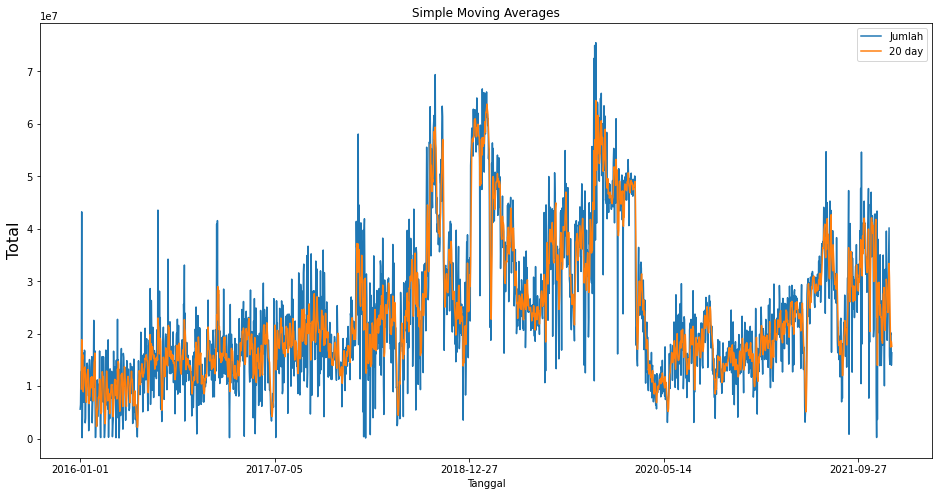

In [92]:
window_variable = str(20) + ' day' + ''
stockprices[window_variable] = stockprices['Jumlah'].rolling(window_size).mean()
### for reference, include 200 day simple moving average
stockprices['50 day'] = stockprices['Jumlah'].rolling(15).mean()

### plotting and performance metrics for simple moving average model
plotting_stock_trend(var = window_variable, current_title = 'Simple Moving Averages')
rmse_sma, mape_sma = calculate_perform_metrics(var=window_variable)
print('RMSE:', rmse_sma)
print('MAPE %:', mape_sma)

AxesSubplot(0.125,0.125;0.775x0.755)
RMSE: 4491058.643624294
MAPE %: 42.83765459634054


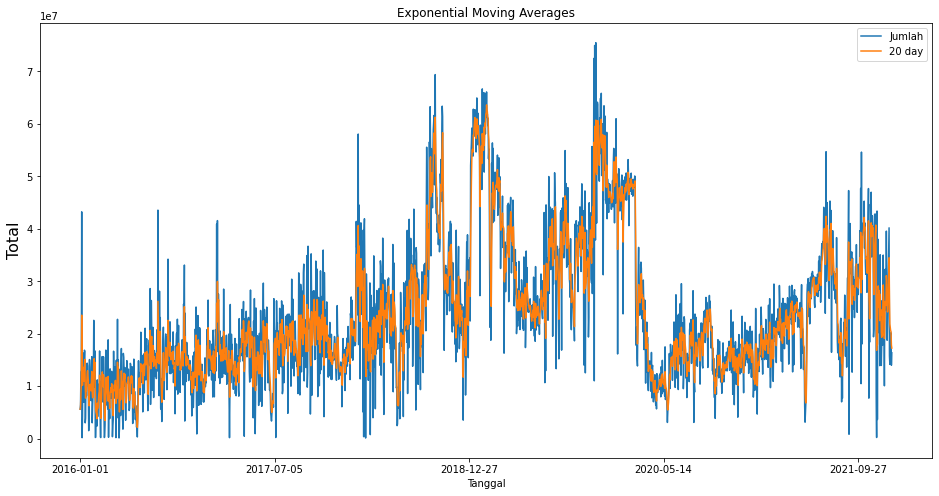

In [93]:
### Exponential MA
window_ema_variable = str(20) + ' day' 
# Calculate the exponentially weighted moving average for the Nth day
stockprices[window_ema_variable] = stockprices['Jumlah'].ewm(span = window_size, adjust = False).mean()
stockprices['50day'] = stockprices['Jumlah'].rolling(15).mean()

### plotting and performance metrics for exponential moving average model
plotting_stock_trend(var = window_ema_variable, current_title = 'Exponential Moving Averages')
rmse_ema, mape_ema = calculate_perform_metrics(var = window_ema_variable)
print('RMSE:', rmse_ema)
print('MAPE %:', mape_ema)

Epoch 1/30
673/673 [==============================] - 8s 7ms/step - loss: 0.8284 - val_loss: 0.5104
Epoch 2/30
673/673 [==============================] - 4s 6ms/step - loss: 0.4601 - val_loss: 0.2955
Epoch 3/30
673/673 [==============================] - 4s 6ms/step - loss: 0.4258 - val_loss: 0.2760
Epoch 4/30
673/673 [==============================] - 4s 5ms/step - loss: 0.4085 - val_loss: 0.2523
Epoch 5/30
673/673 [==============================] - 4s 6ms/step - loss: 0.3953 - val_loss: 0.2401
Epoch 6/30
673/673 [==============================] - 4s 6ms/step - loss: 0.3838 - val_loss: 0.2387
Epoch 7/30
673/673 [==============================] - 4s 5ms/step - loss: 0.3790 - val_loss: 0.2380
Epoch 8/30
673/673 [==============================] - 4s 5ms/step - loss: 0.3744 - val_loss: 0.2425
Epoch 9/30
673/673 [==============================] - 4s 5ms/step - loss: 0.3712 - val_loss: 0.2536
Epoch 10/30
673/673 [==============================] - 4s 5ms/step - loss: 0.3689 - val_loss: 0.2552

/home/rspn/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


19/19 [==============================] - 1s 3ms/step
RMSE  : 6848709.888223573
MAPE %: 63.42715854653197


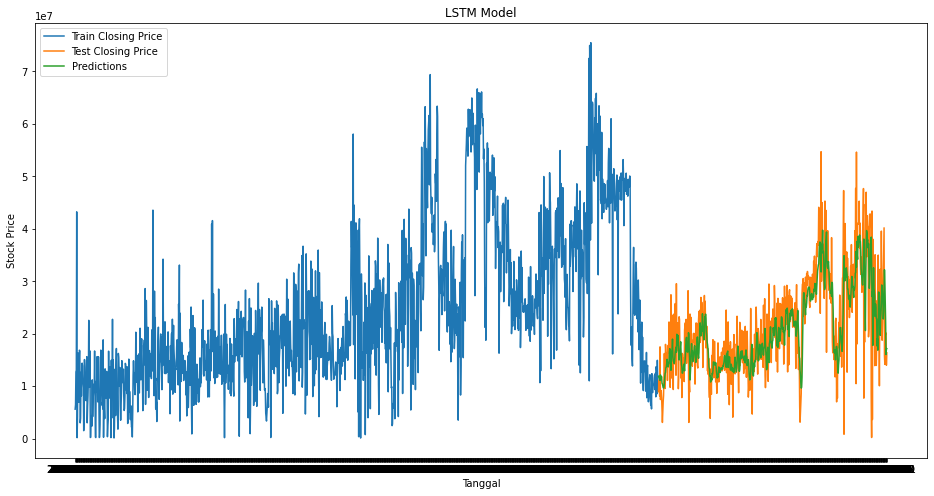

In [95]:
layer_units = 2
#optimizer = ' '
current_epochs = 30
current_batch_size = 2

current_LSTM_parameters = {'units': layer_units,
                           'batch_size': current_batch_size,
                           'epochs': current_epochs
                          }
    
## use the past N stock prices for training to predict the N+1th closing price

# scale 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(stockprices[['Jumlah']])
scaled_data_train = scaled_data[:train.shape[0]]
   
X_train, y_train = extract_seqX_outcomeY(scaled_data_train, window_size, window_size)

### build a LSTM model
def Run_LSTM(X_train, layer_units = 2):
    inp = Input(shape=(X_train.shape[1], 1))

    x = LSTM(units=layer_units, return_sequences=True)(inp)
    x = LSTM(units=layer_units)(x)
    out = Dense(1, activation='linear')(x)
    model = Model(inp, out)

    # Compile the LSTM model
    model.compile(loss = 'mean_squared_error')

    return model
    
model = Run_LSTM(X_train, layer_units = layer_units)

history = model.fit(X_train, y_train, epochs=current_epochs, batch_size=current_batch_size, verbose=1, validation_split=0.1, shuffle=True)

# predicting stock price using past window_size stock prices
def preprocess_test_data(data=stockprices, scaler=scaler, window_size=window_size, test=test): 
    raw = data['Jumlah'][len(data) - len(test) - window_size:].values
    raw = raw.reshape(-1,1)
    raw = scaler.transform(raw)

    X_test = []
    for i in range(window_size, raw.shape[0]):
        X_test.append(raw[i-window_size:i, 0])
        
    X_test = np.array(X_test)

    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    return X_test
    
X_test = preprocess_test_data()

predicted_price_ = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price_)

# plot predicted price vs actual closing price
test['Predictions_lstm'] = predicted_price

# Evaluate performance
rmse_lstm = calculate_rmse(np.array(test['Jumlah']), np.array(test['Predictions_lstm']))
mape_lstm = calculate_mape(np.array(test['Jumlah']), np.array(test['Predictions_lstm']))


### Plot preidiction and true trends
def plotting_stock_trend_lstm(train, test):        
    fig = plt.figure(figsize = (16,8))
    plt.plot(train['Tanggal'], train['Jumlah'], label = 'Train Closing Price')
    plt.plot(test['Tanggal'], test['Jumlah'], label = 'Test Closing Price')
    plt.plot(test['Tanggal'], test['Predictions_lstm'], label = 'Predictions')
    plt.title('LSTM Model')
    plt.xlabel('Tanggal')
    plt.ylabel('Stock Price')
    plt.legend(loc="upper left")

plotting_stock_trend_lstm(train, test,)

print("RMSE  :",rmse_lstm)
print("MAPE %:",mape_lstm)

    